In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import country_converter as coco
import plotly.express as px
import plotly.io as pio
from plotly.subplots import make_subplots
pio.renderers.default = 'iframe'

import warnings
warnings.filterwarnings('ignore')
import plotly.graph_objs as go
from dash import Dash, dcc, html, Input, Output
import dash_core_components as dcc
import dash_html_components as html


from sklearn.model_selection import train_test_split
from sklearn import linear_model, tree, neighbors
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsClassifier


In [2]:
df = pd.read_csv('../data/world_data_cleaned_en.csv')
df

,Country,Year,Population,Life Expectancy,Birth Rate,Death Rate,Unemployment,Employment in Industry,Employment in Agriculture,GDP,Compulsory Education,Internet Users,National Income per Capita,Net Income from Abroad,Trade in Services,Imports of Goods and Services,Exports of Goods and Services,Country Code,Continent,Status
0,Afghanistan,2022,41128771,61.982,35.842,7.344,14.100,18.340073,46.589070,1.426650e+10,9.0,18.400000,-22.902651,8.613293e+07,9.043845,37.069564,14.342153,AFG,Asia,Least Developed
1,Afghanistan,2021,40099462,61.982,35.842,7.344,12.075,18.635343,46.587823,1.426650e+10,9.0,18.400000,-22.902651,8.613293e+07,9.043845,37.069564,14.342153,AFG,Asia,Least Developed
2,Afghanistan,2020,38972230,62.575,36.051,7.113,11.710,18.481322,45.983408,1.995593e+10,9.0,18.400000,-4.504431,1.492277e+08,9.043845,36.289077,10.420817,AFG,Asia,Least Developed
3,Afghanistan,2019,37769499,63.565,36.466,6.791,11.082,18.228116,45.016040,1.879944e+10,9.0,17.600000,-4.504431,2.812175e+08,9.918134,24.747175,43.422926,AFG,Asia,Least Developed
4,Afghanistan,2018,36686784,63.081,36.927,6.981,11.131,18.143741,44.453600,1.805322e+10,9.0,16.800000,-4.504431,2.412913e+08,11.638305,24.747175,43.422926,AFG,Asia,Least Developed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4727,Zimbabwe,1999,11716454,45.206,35.263,16.301,6.000,12.640459,64.153401,6.858013e+09,7.0,0.161676,16.226788,-2.288488e+09,12.192855,33.514080,37.408580,ZWE,Africa,Developing
4728,Zimbabwe,1998,11548364,46.819,34.521,15.150,6.356,12.771517,63.859997,6.401968e+09,7.0,0.081648,16.226788,-2.479862e+09,12.192855,45.120957,43.393085,ZWE,Africa,Developing
4729,Zimbabwe,1997,11362401,47.993,33.799,14.357,6.930,12.838733,64.138891,8.529572e+09,7.0,0.033080,16.226788,-2.608686e+09,12.192855,44.609791,37.595273,ZWE,Africa,Developing
4730,Zimbabwe,1996,11178171,48.955,33.190,13.755,6.123,12.899451,64.326413,8.553147e+09,7.0,0.016790,16.226788,-2.054743e+09,12.192855,35.939548,36.130073,ZWE,Africa,Developing


# **Các dạng biểu đồ để xem phân bố của dữ liệu**

In [3]:
df.dtypes

Country                           object
Year                               int64
Population                         int64
Life Expectancy                  float64
Birth Rate                       float64
Death Rate                       float64
Unemployment                     float64
Employment in Industry           float64
Employment in Agriculture        float64
GDP                              float64
Compulsory Education             float64
Internet Users                   float64
National Income per Capita       float64
Net Income from Abroad           float64
Trade in Services                float64
Imports of Goods and Services    float64
Exports of Goods and Services    float64
Country Code                      object
Continent                         object
Status                            object
dtype: object

## **I/ Histogram với seaborn**

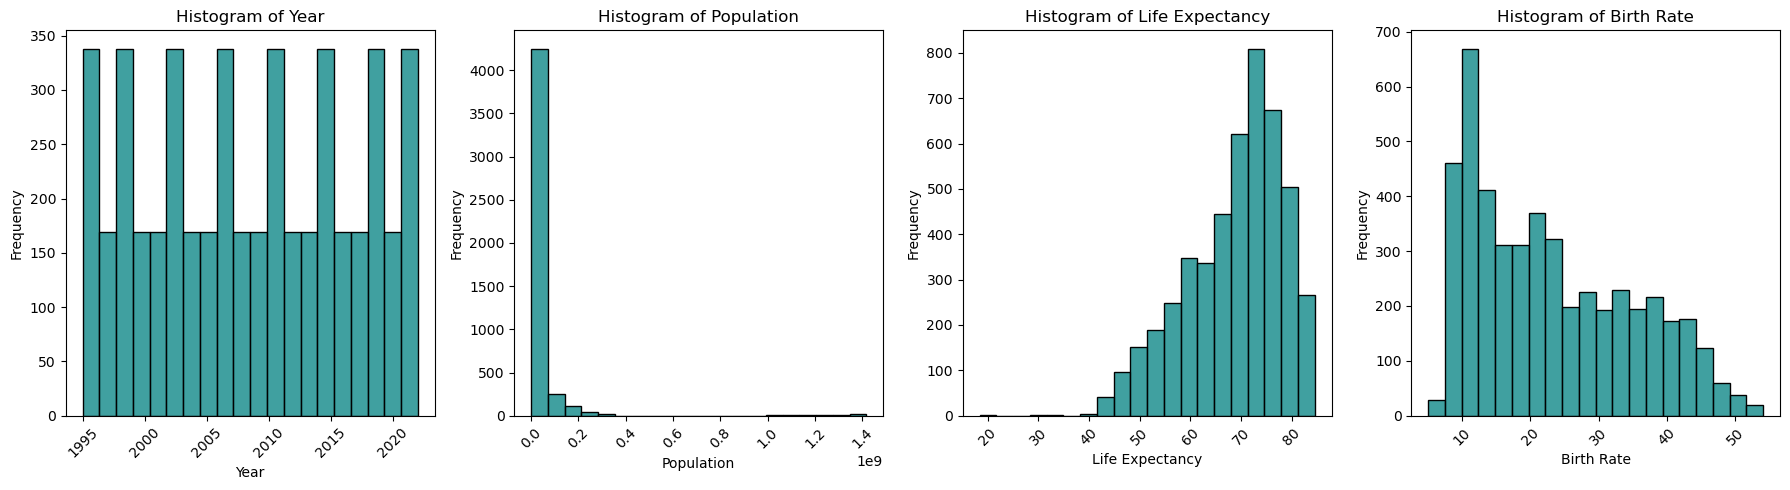

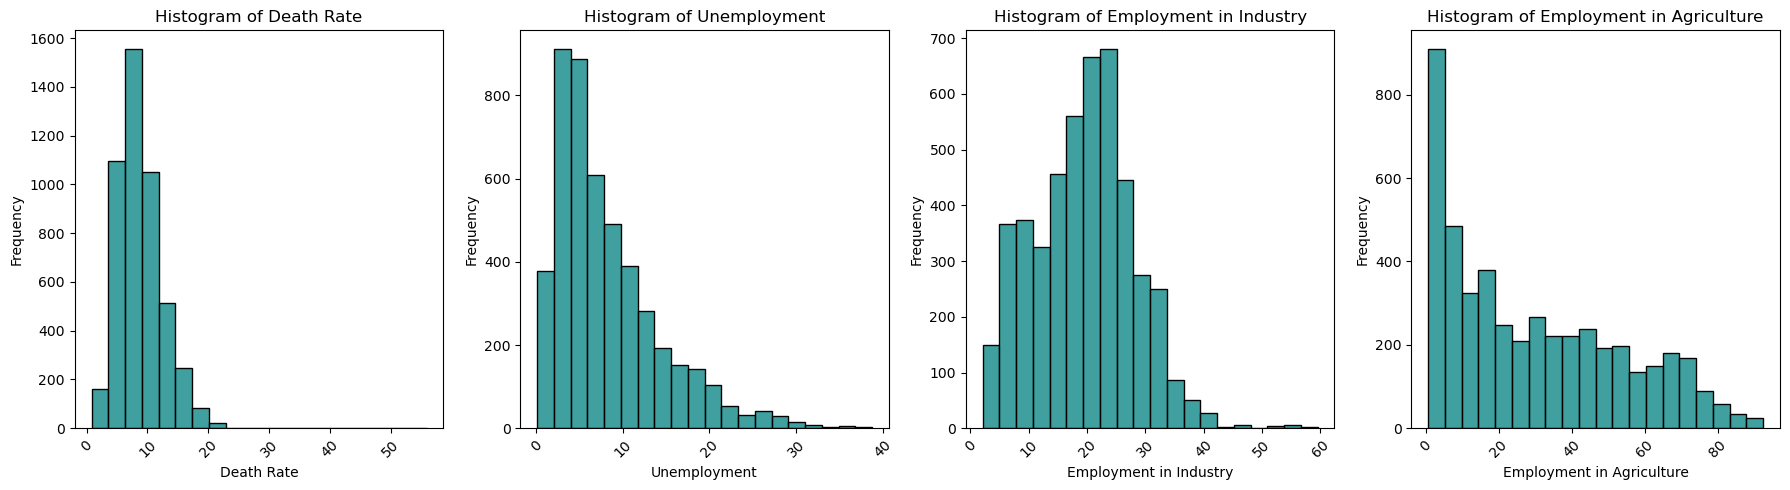

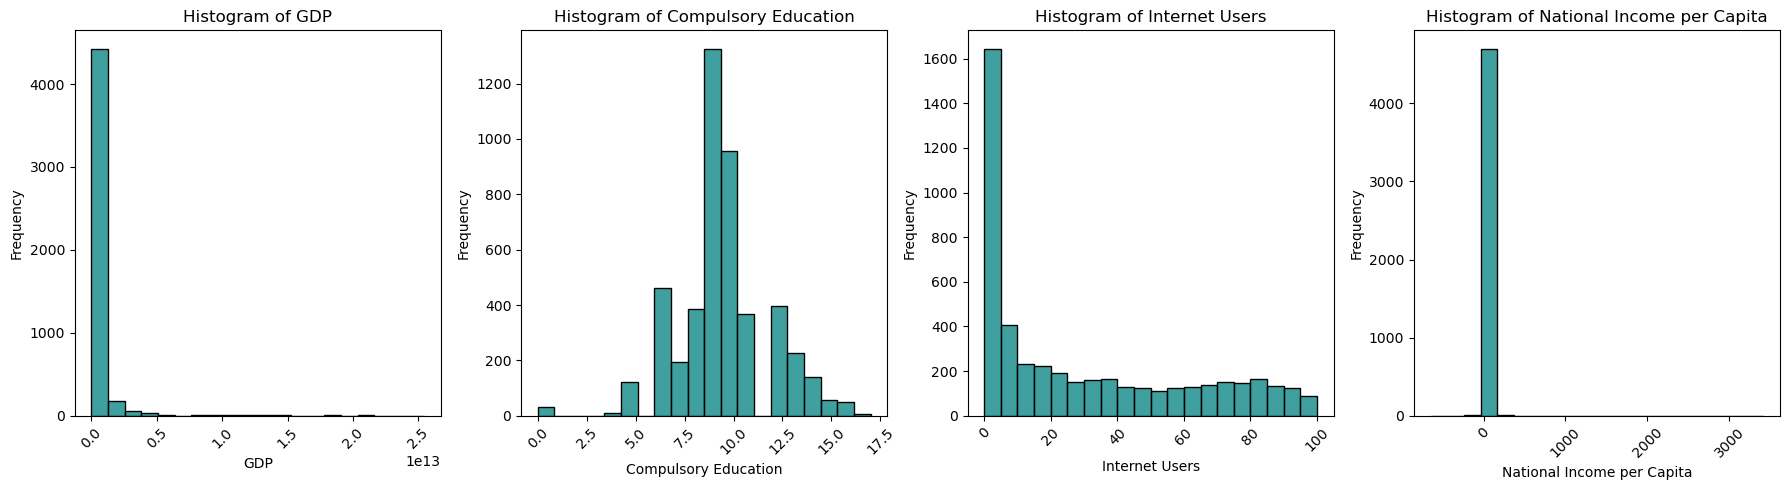

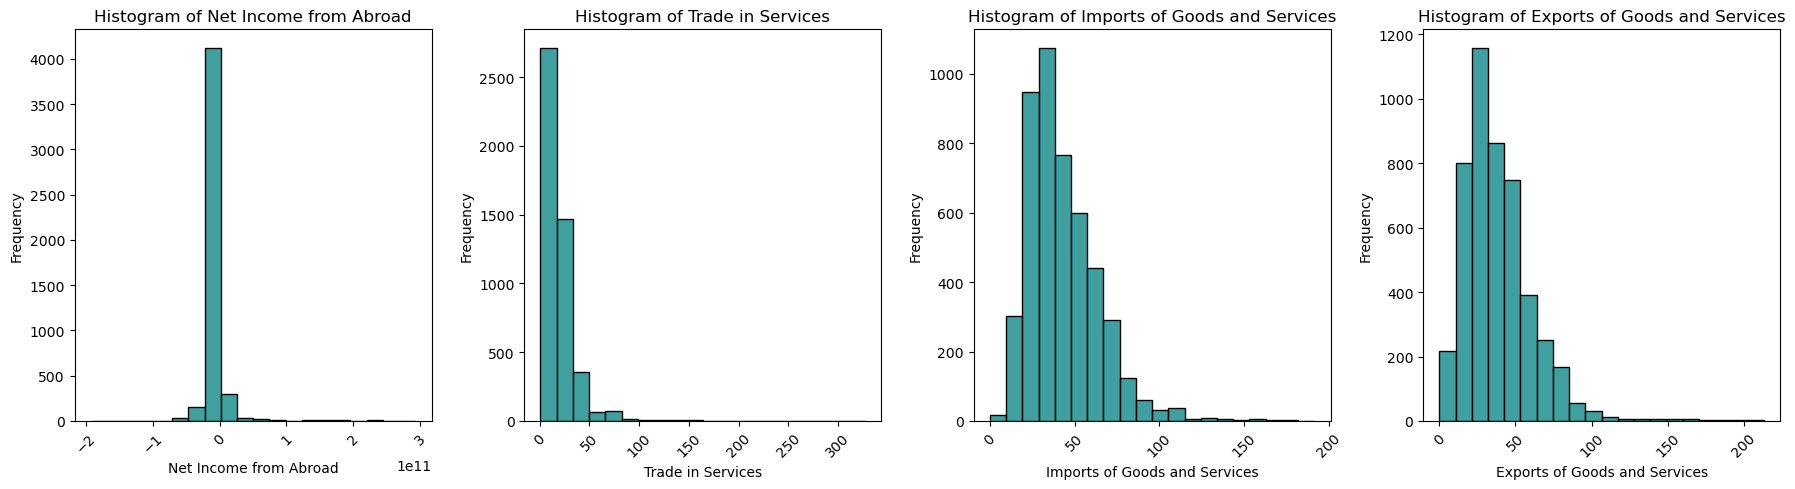

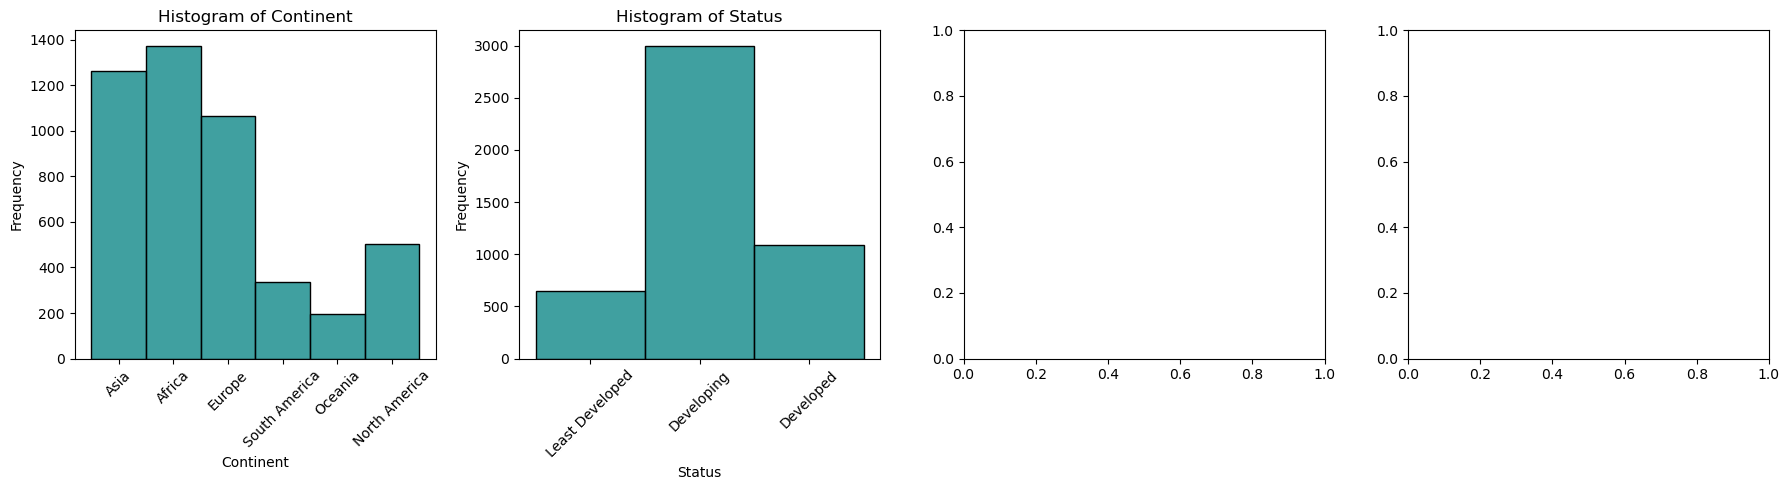

In [4]:
columns = df.columns[(df.columns != 'Country') & (df.columns != 'Country Code')]

columns_per_row = 4

num_rows = (len(columns) - 1) // columns_per_row + 1

for i in range(num_rows):
    fig, axs = plt.subplots(1, columns_per_row, figsize=(18, 5))  
    for j in range(columns_per_row):
        idx = i * columns_per_row + j
        if idx < len(columns):
            sns.histplot(df[columns[idx]], bins=20, color="teal", edgecolor="black", ax=axs[j])
            axs[j].set_title(f'Histogram of {columns[idx]}')
            axs[j].set_xlabel(columns[idx])
            axs[j].set_ylabel('Frequency')
            axs[j].tick_params(axis='x', rotation=45)  
            axs[j].grid(False)
    plt.tight_layout()
    plt.show()


## **II/ HeatMap thể hiện độ tương quan với seaborn**

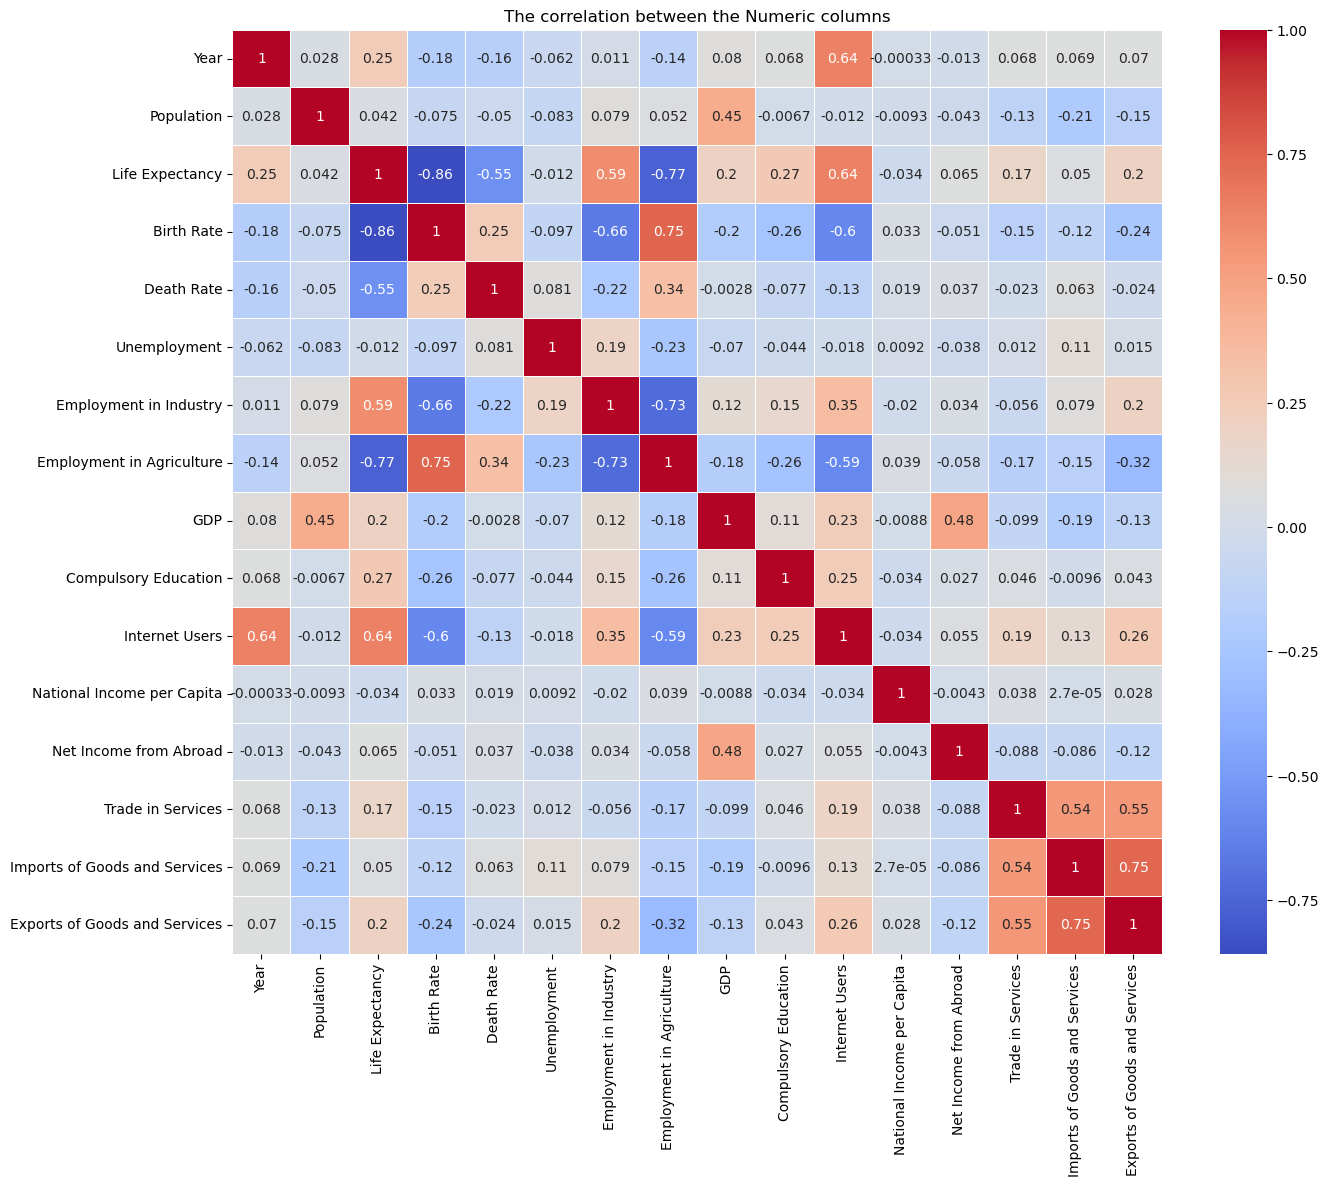

In [5]:
numeric_columns = df.select_dtypes(include='number')
plt.figure(figsize=(15, 12))
sns.heatmap(numeric_columns.corr(), annot=True, cmap='coolwarm', linewidths=.5)
plt.title('The correlation between the Numeric columns')
plt.show()

## **III/ Box plot**

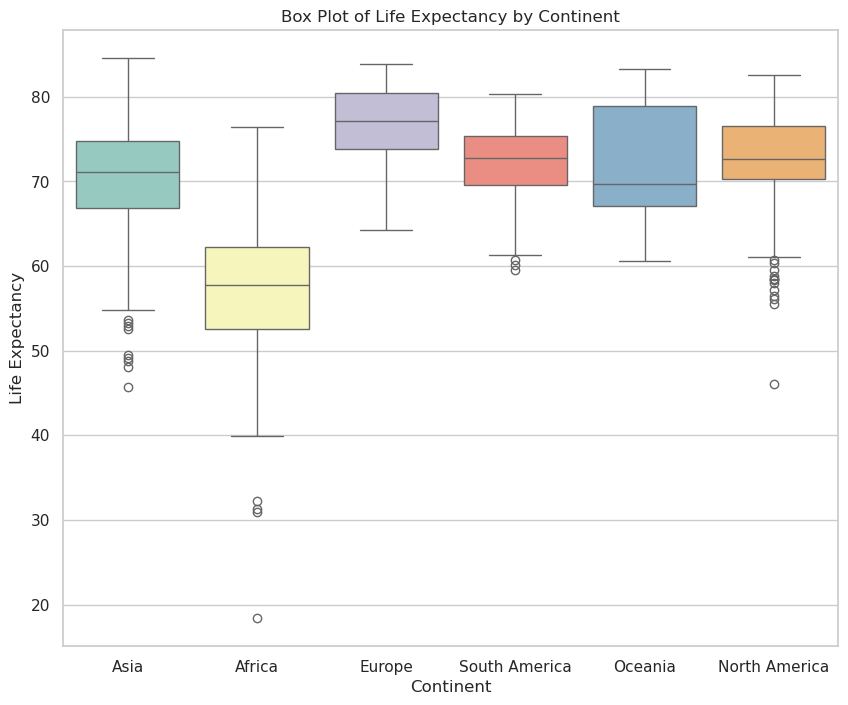

In [6]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 8))
sns.boxplot(x='Continent', y='Life Expectancy', data=df, palette='Set3')
plt.title('Box Plot of Life Expectancy by Continent')
plt.xlabel('Continent')
plt.ylabel('Life Expectancy')
plt.show()

## **IV/ Scatter plot**

In [7]:
fig = make_subplots(rows=2, cols=2, subplot_titles=('Life Expectancy Over Years', 'Population Over Years', 'Life Expectancy vs. GDP', 'Life Expectancy vs. Internet Users'),
                    row_heights=[0.5, 0.5], column_widths=[0.5, 0.5],
                    specs=[[{"type": "scatter"}, {"type": "scatter"}],
                           [{"type": "scatter"}, {"type": "scatter"}]])

fig.add_trace(go.Scatter(x=df['Year'], y=df['Life Expectancy'], mode='markers', marker=dict(size=8),
                         name='Life Expectancy', marker_color='blue'), row=1, col=1)
fig.update_xaxes(title_text='Year', row=1, col=1)
fig.update_yaxes(title_text='Life Expectancy', row=1, col=1)

fig.add_trace(go.Scatter(x=df['Year'], y=df['Population'], mode='markers', marker=dict(size=8),
                         name='Population', marker_color='green'), row=1, col=2)
fig.update_xaxes(title_text='Year', row=1, col=2)
fig.update_yaxes(title_text='Population', row=1, col=2)

fig.add_trace(go.Scatter(x=df['GDP'], y=df['Life Expectancy'], mode='markers', marker=dict(size=8),
                         name='Life Expectancy', marker_color='red'), row=2, col=1)
fig.update_xaxes(title_text='GDP', row=2, col=1)
fig.update_yaxes(title_text='Life Expectancy', row=2, col=1)

fig.add_trace(go.Scatter(x=df['Internet Users'], y=df['Life Expectancy'], mode='markers', marker=dict(size=8),
                         name='Life Expectancy', marker_color='purple'), row=2, col=2)
fig.update_xaxes(title_text='Internet Users', row=2, col=2)
fig.update_yaxes(title_text='Life Expectancy', row=2, col=2)

# Chỉnh kích thước của biểu đồ
fig.update_layout(width=1200, height=800)

# Hiển thị biểu đồ
fig.show()

## **V/ Scatter plot với animation của plotly (2D plot)** 

In [8]:
sorted_df = df.sort_values(by='Year')

In [9]:
fig = px.scatter(
    sorted_df,
    y='Death Rate',
    x='Life Expectancy',
    animation_frame='Year',
    animation_group='Country',
    size='Life Expectancy',
    color='Country',
    hover_name='Country',
    title='<b> Life expectancy vs Death Rate of countries over years'
)
fig.show()

## **VI/ 3D plot với mesh plot bằng 3 cột thuộc tính**

In [10]:
mesh_plot = go.Figure(data=[go.Mesh3d(x=df['Death Rate'], y=df['Birth Rate'], z=df['Life Expectancy'], 
                                       # color=df['Continent'], 
                                       intensity=df['Life Expectancy'],
                                       hoverinfo='text',
                                       hovertext=df['Continent'] + '<br>Life Expectancy: ' + df['Life Expectancy'].astype(str),
                                       colorscale='Viridis')])
mesh_plot.update_layout(title='Mesh 3D Plot', scene=dict(xaxis_title='Death Rate', yaxis_title='Birth Rate', zaxis_title='Life Expectancy'))

mesh_plot.show()


# **Các dạng biểu đồ cơ bản để trả lời các câu hỏi về dữ liệu**

## **I/ Line chart (có thể ứng dụng plotly để tương tác**

In [11]:
# app = Dash(__name__)

# app.layout = html.Div([
#     dcc.Dropdown(
#         id='country-dropdown',
#         options=[{'label': country, 'value': country} for country in df['Country'].unique()],
#         value=df['Country'].unique()[0]
#     ),
#     dcc.Graph(id='life-expectancy-graph')
# ])

# @app.callback(
#     Output('life-expectancy-graph', 'figure'),
#     [Input('country-dropdown', 'value')]
# )
# def update_life_expectancy_graph(selected_country):
#     df_selected_country = df[df['Country'] == selected_country]
    
#     fig = go.Figure()
#     fig.add_trace(go.Scatter(x=df_selected_country['Year'], y=df_selected_country['Life Expectancy'],
#                              mode='lines', name='Life Expectancy'))
    
#     fig.update_layout(
#         title=f'Life Expectancy Over Years in {selected_country}',
#         xaxis_title='Year',
#         yaxis_title='Life Expectancy',
#         yaxis=dict(range=[40, 100])
#     )
    
#     return fig

# # Chạy ứng dụng
# if __name__ == '__main__':
#     app.run_server(debug=True, port=8051)
import pandas as pd
import plotly.graph_objs as go
import dash
from dash import dcc, html
from dash.dependencies import Input, Output

# Assuming df is defined and contains the required data

# 1. Check DataFrame
# print(df.head())

# Define the app
app = dash.Dash(__name__)

app.layout = html.Div([
    dcc.Dropdown(
        id='country-dropdown',
        options=[{'label': country, 'value': country} for country in df['Country'].unique()],
        value=df['Country'].unique()[0]
    ),
    dcc.Graph(id='life-expectancy-graph')
])

# 2. Check Dropdown Value
@app.callback(
    Output('life-expectancy-graph', 'figure'),
    [Input('country-dropdown', 'value')]
)
def update_life_expectancy_graph(selected_country):
    # print("Selected Country:", selected_country)  # Check selected_country value
    df_selected_country = df[df['Country'] == selected_country]
    
    # 3. Check DataFrame Filtering
    # print(df_selected_country.head())  # Check filtered DataFrame
    
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=df_selected_country['Year'], y=df_selected_country['Life Expectancy'],
                             mode='lines', name='Life Expectancy'))
    
    fig.update_layout(
        title=f'Life Expectancy Over Years in {selected_country}',
        xaxis_title='Year',
        yaxis_title='Life Expectancy',
        yaxis=dict(range=[40, 100])
    )
    
    return fig

# Chạy ứng dụng
if __name__ == '__main__':
    app.run_server(debug=True, port=8051)


### **Line chart tĩnh với seaborn**

In [12]:
developed_data = df[df['Status'] == 'Developed']
developing_data = df[df['Status'] == 'Developing']
least_data = df[df['Status'] == 'Least Developed']

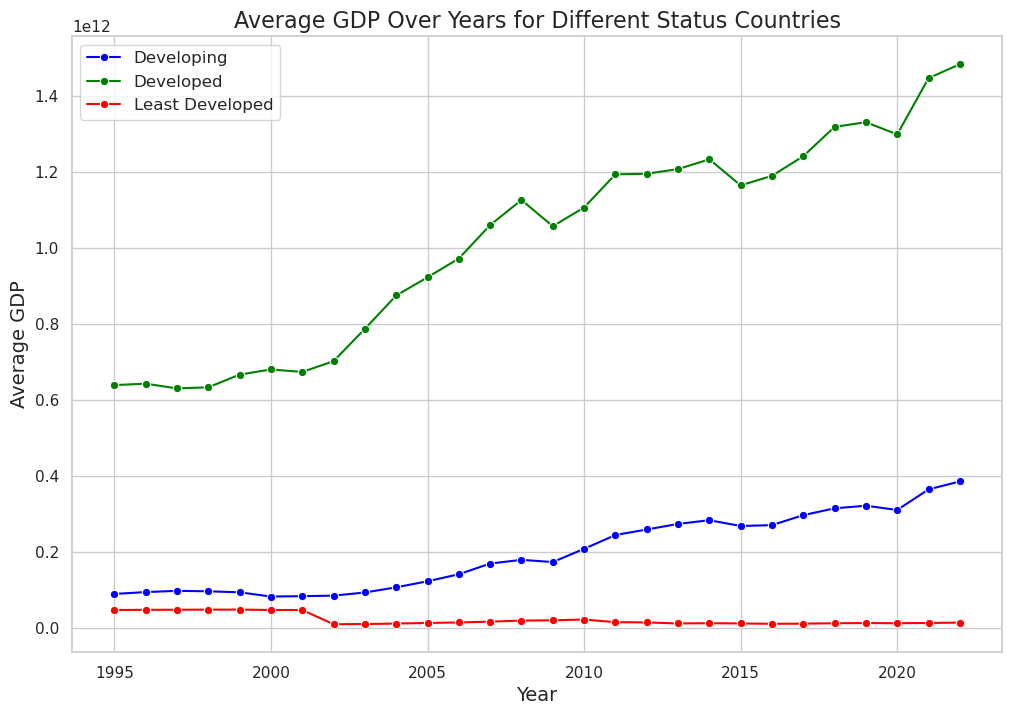

In [13]:
avg_developing = developing_data.groupby('Year')['GDP'].mean().reset_index()
avg_developed = developed_data.groupby('Year')['GDP'].mean().reset_index()
avg_least_developed = least_data.groupby('Year')['GDP'].mean().reset_index()

plt.figure(figsize=(12, 8))

sns.lineplot(data=avg_developing, x='Year', y='GDP', label='Developing', marker='o', color='blue')
sns.lineplot(data=avg_developed, x='Year', y='GDP', label='Developed', marker='o', color='green')
sns.lineplot(data=avg_least_developed, x='Year', y='GDP', label='Least Developed', marker='o', color='red')

plt.title('Average GDP Over Years for Different Status Countries', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average GDP', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)

plt.show()

## **II/ Bar chart** (ở đây có thể dùng để trả lời 2 câu hỏi)
- 1/ Oversimplification
- 2/ Too much information

### **II.1/ Oversimplification**

### Bar chart ngang (plotly)

In [14]:
country_counts = df['Continent'].value_counts()

fig = px.bar(x=country_counts.values, y=country_counts.index, color=country_counts.index , orientation='h')
fig.show()

### Bar chart dọc bằng seaborn

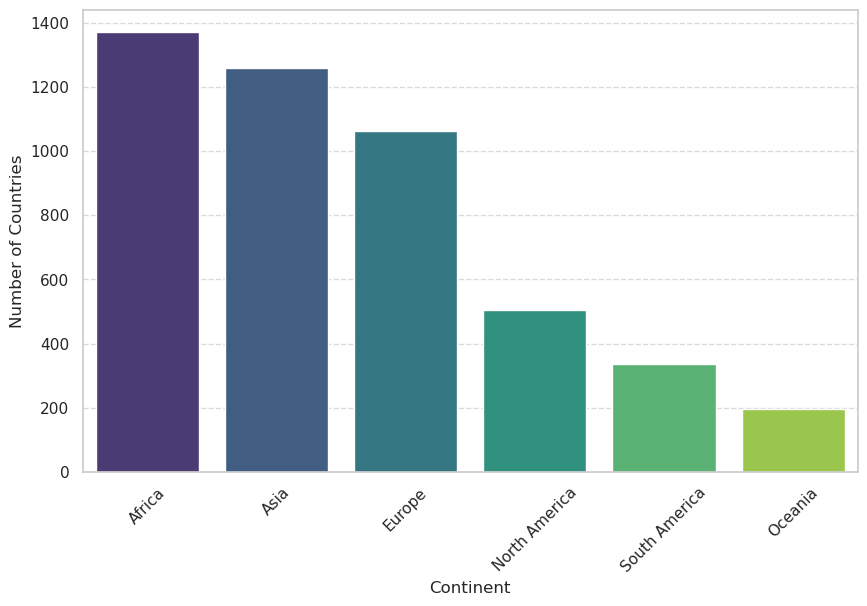

In [15]:
plt.figure(figsize=(10, 6))
sns.barplot(x=country_counts.index, y=country_counts.values, palette='viridis')
plt.xlabel('Continent')
plt.ylabel('Number of Countries')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### **II.2/ Too much information**

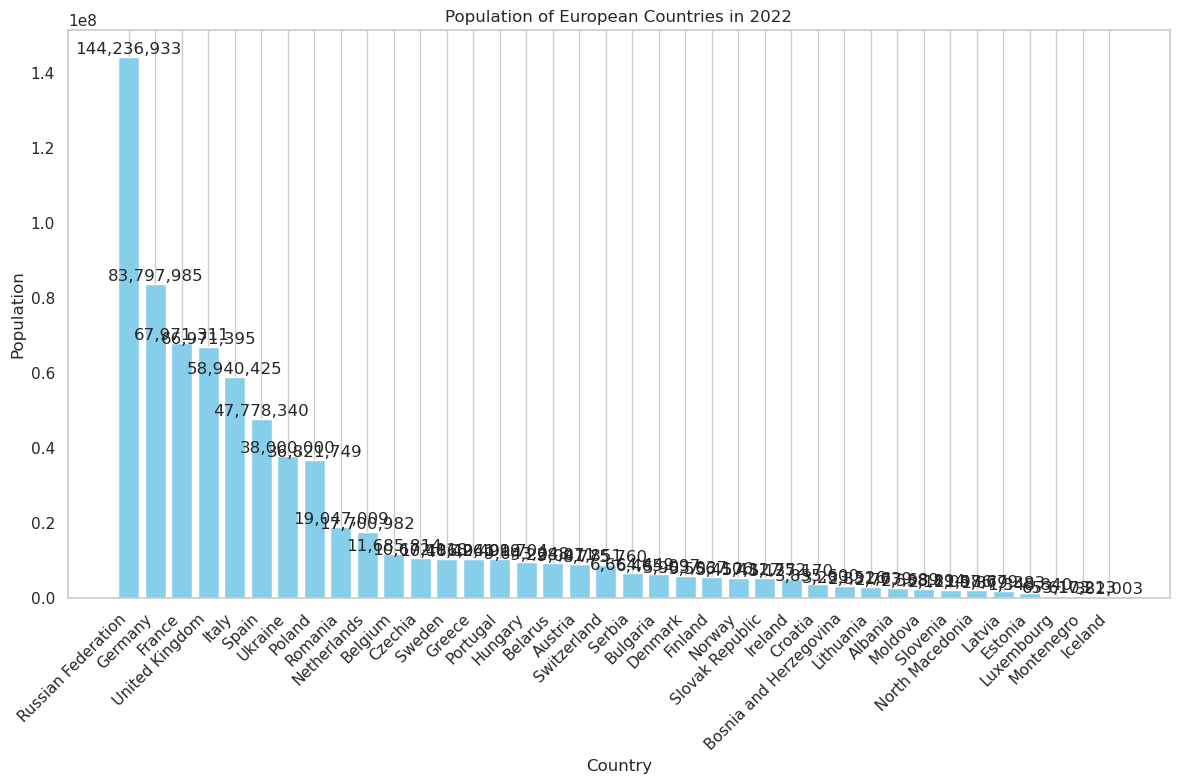

In [16]:
data_europe_2022 = df[(df['Year'] == 2022) & (df['Continent'] == 'Europe')]

data_europe_2022_sorted = data_europe_2022.sort_values(by='Population', ascending=False)

plt.figure(figsize=(12, 8))
plt.bar(data_europe_2022_sorted['Country'], data_europe_2022_sorted['Population'], color='skyblue')

for i, value in enumerate(data_europe_2022_sorted['Population']):
    plt.text(i, value, f'{value:,}', ha='center', va='bottom')

plt.title('Population of European Countries in 2022')
plt.xlabel('Country')
plt.ylabel('Population')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')

plt.tight_layout()
plt.show()

### **II.3/ Một số dạng khác**

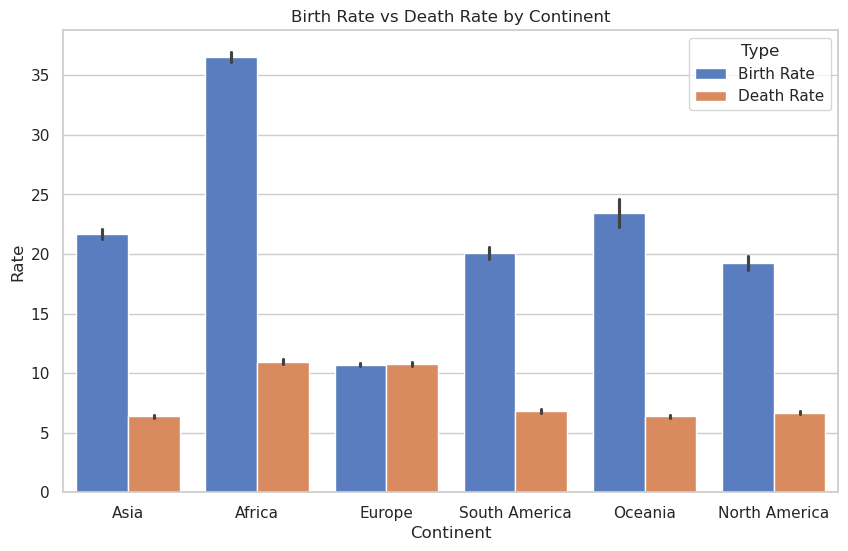

In [17]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.barplot(x='Continent', y='value', hue='variable', data=df.melt(id_vars='Continent', value_vars=['Birth Rate', 'Death Rate']),
            palette='muted')
plt.title('Birth Rate vs Death Rate by Continent')
plt.xlabel('Continent')
plt.ylabel('Rate')
plt.legend(title='Type')
plt.show()

# **III/ Pie chart (thể hiện phần trăm)**

Pie chart to show the percentages status

In [18]:
developing_countries = df[df['Status'] == 'Developing']['Country'].unique()
developed_countries = df[df['Status'] == 'Developed']['Country'].unique()
least_countries = df[df['Status'] == 'Least Developed']['Country'].unique()

color = ["#005F6A", "#E1C699", '#9A6A4F']
fig = px.pie(values = [len(developing_countries), len(developed_countries), len(least_countries)], names = ['Developing', 'Developed', 'Least Developed'],
             title = "Development Status", color_discrete_sequence= color)
fig.update_layout(showlegend = True, title_font = dict(size = 20), width = 800, height = 800)
fig.update_traces(textinfo = "percent + label", pull = [0.05, 0.05], textfont=dict(size = 13))
fig.show()

# **Trực quan trong các mô hình học máy**

## **I/ Regression**

- Đối với model regression thì data ở đây sẽ dùng là data về tips có sẵn tích hợp của plotly

In [19]:
app = Dash(__name__)

models = {'Regression': linear_model.LinearRegression,
          'Decision Tree': tree.DecisionTreeRegressor,
          'k-NN': neighbors.KNeighborsRegressor}

app.layout = html.Div([
    html.H4("Predicting restaurant's revenue"),
    html.P("Select model:"),
    dcc.Dropdown(
        id='dropdown',
        options=["Regression", "Decision Tree", "k-NN"],
        value='Decision Tree',
        clearable=False
    ),
    dcc.Graph(id="graph"),
])


@app.callback(
    Output("graph", "figure"), 
    Input('dropdown', "value"))
def train_and_display(name):
    df = px.data.tips() # replace with your own data source
    X = df.total_bill.values[:, None]
    X_train, X_test, y_train, y_test = train_test_split(
        X, df.tip, random_state=42)

    model = models[name]()
    model.fit(X_train, y_train)

    x_range = np.linspace(X.min(), X.max(), 100)
    y_range = model.predict(x_range.reshape(-1, 1))

    fig = go.Figure([
        go.Scatter(x=X_train.squeeze(), y=y_train, 
                   name='train', mode='markers'),
        go.Scatter(x=X_test.squeeze(), y=y_test, 
                   name='test', mode='markers'),
        go.Scatter(x=x_range, y=y_range, 
                   name='prediction')
    ])
    return fig

app.run_server(debug=True)

- Ngoài việc trực quan 2D các điểm dữ liệu mà mô hình dự đoán thì chúng ta còn có thể trực quan 3D với mô hình regression. Dưới đây là ví dụ với mo hình Iris

In [20]:
mesh_size = .02
margin = 0

df1 = px.data.iris()

X = df1[['sepal_width', 'sepal_length']]
y = df1['petal_width']

model = SVR(C=1.)
model.fit(X, y)

x_min, x_max = X.sepal_width.min() - margin, X.sepal_width.max() + margin
y_min, y_max = X.sepal_length.min() - margin, X.sepal_length.max() + margin
xrange = np.arange(x_min, x_max, mesh_size)
yrange = np.arange(y_min, y_max, mesh_size)
xx, yy = np.meshgrid(xrange, yrange)

pred = model.predict(np.c_[xx.ravel(), yy.ravel()])
pred = pred.reshape(xx.shape)

fig = px.scatter_3d(df1, x='sepal_width', y='sepal_length', z='petal_width')
fig.update_traces(marker=dict(size=5))
fig.add_traces(go.Surface(x=xrange, y=yrange, z=pred, name='pred_surface'))
fig.show()

## **II/ Classification**

- Đối với data iris, chúng ta sẽ dùng mô hình KNN để phân lớp chúng

In [21]:
mesh_size = .02
margin = 1

df2 = px.data.iris()
df2_train, df2_test = train_test_split(df2, test_size=0.25, random_state=0)
X_train = df2_train[['sepal_length', 'sepal_width']]
y_train = df2_train.species_id

l_min, l_max = df2.sepal_length.min() - margin, df2.sepal_length.max() + margin
w_min, w_max = df2.sepal_width.min() - margin, df2.sepal_width.max() + margin
lrange = np.arange(l_min, l_max, mesh_size)
wrange = np.arange(w_min, w_max, mesh_size)
ll, ww = np.meshgrid(lrange, wrange)

clf = KNeighborsClassifier(15, weights='distance')
clf.fit(X_train, y_train)
Z = clf.predict(np.c_[ll.ravel(), ww.ravel()])
Z = Z.reshape(ll.shape)
proba = clf.predict_proba(np.c_[ll.ravel(), ww.ravel()])
proba = proba.reshape(ll.shape + (3,))

diff = proba.max(axis=-1) - (proba.sum(axis=-1) - proba.max(axis=-1))

fig = px.scatter(
    df2_test, x='sepal_length', y='sepal_width',
    symbol='species',
    symbol_map={
        'setosa': 'square-dot',
        'versicolor': 'circle-dot',
        'virginica': 'diamond-dot'},
)
fig.update_traces(
    marker_size=12, marker_line_width=1.5,
    marker_color="lightyellow"
)
fig.add_trace(
    go.Heatmap(
        x=lrange,
        y=wrange,
        z=diff,
        opacity=0.25,
        customdata=proba,
        colorscale='RdBu',
        hovertemplate=(
            'sepal length: %{x} <br>'
            'sepal width: %{y} <br>'
            'p(setosa): %{customdata[0]:.3f}<br>'
            'p(versicolor): %{customdata[1]:.3f}<br>'
            'p(virginica): %{customdata[2]:.3f}<extra></extra>'
        )
    )
)
fig.update_layout(
    legend_orientation='h',
    title='Prediction Confidence on Test Split'
)
fig.show()